<a href="https://colab.research.google.com/github/erica-mccormick/erica-mccormick.github.io/blob/main/cross_sections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Create and Plot Cross Sections**

In [65]:
import gdal
import osr
import matplotlib.pyplot as plt
from numpy import arange, array, nonzero, in1d, abs, linspace, sqrt, pi
import pandas as pd
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings('ignore')

In [2]:
#UTEXAS EMAIL
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**(1) Pick your path to the Nature -> Tiffs -> Final folder in GDrive**

In [3]:
path = '/content/drive/MyDrive/Rock moisture/RM1b_NatureReview/tiffs/final/'
lithology_path = '/content/drive/MyDrive/Rock moisture/RM5_Lithology/'

#*PART 1: CREATE CROSS SECTIONS*
Can also skip to plotting and pull in csvs, if you have them.

##**(2) Choose which rasters you would xsections from. Note that if you choose all of them, it will take ~20 mins per pair of points.**

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

def choose_data(PET_Har, PET_over_P, Biomass, Lithology, SRTM_250m, Dmax_2010):
    return PET_Har, PET_over_P, Biomass, Lithology, SRTM_250m, Dmax_2010

w = interactive(choose_data, PET_Har=True, PET_over_P=True, Biomass=True, Lithology=True, SRTM_250m=True, Dmax_2010=True)

print('\nWhat variables would you like to extract?')

display(w)


What variables would you like to extract?


interactive(children=(Checkbox(value=True, description='PET_Har'), Checkbox(value=True, description='PET_over_…

##**(3) Run the necessary functions**

In [ ]:
dmax = path+'deficits/dmax_nomask/Dmax_2010_NoMask.tif'
pet_p = path+'products_used/PET:P/PET_P_2010.tif'
biomass = path+'products_used/biomass.tif'
pet = path+'products_used/pet_annual_hargreaves/2004_2007/2010.tif'
lith = path+'products_used/lith_500_mode.tif'
srtm_250 = path+'products_used/srtm_250m.tif'

In [ ]:
# This whole chunk modified from someone on StackOverflow that I can't find now

def d2k(degrees, radius=6371):

    return degrees * (2.0 * radius * pi / 360.0)

# Find Nearest point in array

def find_nearest(array,value):

    idx = (abs(array-value)).argmin()

    return idx

def plot_cross_elv(raster=None, A=None, B=None, np=500):#y_label = None, 

    # Read raster data

    ds = gdal.Open(raster, 0)
    rb = ds.ReadAsArray()

    # Get start/end point of the map in lon/lat

    coords = ds.GetGeoTransform()

    # Get lon/lat and elevation

    lon = array([coords[0]+coords[1]*i for i in range(rb.shape[1])])
    lat = array([coords[3]+coords[5]*i for i in range(rb.shape[0])])
    elv = rb.flatten()

    # Make pairs of (lon,lat)

    points = array([array([x,y]) for y in lat for x in lon])

    # Define Profile using lon/lat

    ABx   = linspace(A[0],B[0],np)
    ABy   = linspace(A[1],B[1],np)

    profile = array([array([x,y]) for x,y in zip(ABx, ABy)])

    # Find Nearest points of profile in Map and Prepare for plot

    cross_dis = []
    cross_elv = []

    for p in profile:

        lon_ind = find_nearest(lon,p[0])
        lat_ind = find_nearest(lat,p[1])

        x = lon[lon_ind]
        y = lat[lat_ind]
        d = sqrt(d2k(A[0]-x)**2+d2k(A[1]-y)**2)
        h = rb[lat_ind][lon_ind]

        cross_dis.append(d)
        cross_elv.append(h)

    return cross_dis, cross_elv

In [ ]:
def cross_df(A, B, w, np=500):
  var_list = ['PET_Har', 'PET_over_P', 'Biomass', 'Lithology', 'SRTM_250m','Dmax_2010']
  raster_list = [pet, pet_p, biomass, lith, srtm_250, dmax]
  num_of_vars = len(var_list)
  df = pd.DataFrame()
  for i in range(num_of_vars):
    if w.kwargs[var_list[i]] == True:
      distance, elev = plot_cross_elv(raster=raster_list[i], A=A, B=B, np=np)
      df[var_list[i]] = elev
    else:
      continue
  df.index = distance
  df['Biomass'] = df['Biomass'] / 10

  return df

##**(4) Specify long/lat pairs (A,B) and run cross_df to get a dataframe of the cross section 'elevation' and distance. You can also specify the number of points to use. Save the df if you would like. This step can take 20 minutes.**

For a list of all endpoints, see [here](https://docs.google.com/spreadsheets/d/1ZiLppNXNEC7iT1e-qXyqwxk8HvALWUnMrKrPyReXJso/edit#gid=0).

In [ ]:
Rivendell = (-123.6433 ,39.7273)
Sagehorn = (-123.477, 39.5745)

A = (-123.732, 39.792)
B = (-123.203, 39.344)

C = (-117.838, 34.376)
D = (-116.599, 33.741)

In [ ]:
df = cross_df(C, D, w)

In [ ]:
df

,PET_Har,PET_over_P,Biomass,Lithology,SRTM_250m,Dmax_2010
0.274443,1191.734689,1.698438,43.4,175.0,1688.0,363.0
0.274443,1191.734689,1.698438,43.4,175.0,1635.0,363.0
0.700389,1191.734689,1.698438,67.5,175.0,1817.0,341.0
0.700389,1191.734689,1.698438,67.5,175.0,1891.0,341.0
1.368363,1191.734689,1.698438,19.6,175.0,1812.0,300.0
...,...,...,...,...,...,...
153.478062,1351.789530,3.537929,1.0,91.0,1278.0,324.0
153.922465,1351.789530,3.537929,7.2,91.0,1191.0,357.0
153.922465,1351.789530,3.537929,7.2,91.0,1171.0,357.0
154.594778,1351.789530,3.537929,21.6,91.0,1094.0,304.0


In [ ]:
# Write the DataFrame to CSV file.
with open('/content/drive/MyDrive/Rock moisture/RM5_Lithology/Data/cross_sections/C_D.csv', 'w') as f:
  df.to_csv(f)

#*PART 2: PLOT CROSS SECTIONS*

This will work for less than 11 lithology groups in a cross section. If you get a list length type error, add more colors to the color_map list.

In [115]:
# bring in lithology unique_id to unit_link key
key = pd.read_csv(lithology_path+'Data/CA_unit_num/attribute_table.csv')

In [127]:
#df = pd.read_csv(lithology_path + 'Data/cross_sections/A_B.csv')
df = pd.read_csv(lithology_path + 'Data/cross_sections/C_D.csv')

In [128]:
## If the index didn't carry through saving for some reason
df['Distance'] = df['Unnamed: 0']
df.index = df['Distance']
del df['Unnamed: 0']

In [129]:
df

,PET_Har,PET_over_P,Biomass,Lithology,SRTM_250m,Dmax_2010,Distance
Distance,,,,,,,
0.274443,1191.734689,1.698438,43.4,175.0,1688.0,363.0,0.274443
0.274443,1191.734689,1.698438,43.4,175.0,1635.0,363.0,0.274443
0.700389,1191.734689,1.698438,67.5,175.0,1817.0,341.0,0.700389
0.700389,1191.734689,1.698438,67.5,175.0,1891.0,341.0,0.700389
1.368363,1191.734689,1.698438,19.6,175.0,1812.0,300.0,1.368363
...,...,...,...,...,...,...,...
153.478062,1351.789530,3.537929,1.0,91.0,1278.0,324.0,153.478062
153.922465,1351.789530,3.537929,7.2,91.0,1191.0,357.0,153.922465
153.922465,1351.789530,3.537929,7.2,91.0,1171.0,357.0,153.922465


##**Functions**

In [130]:
def group_liths(df):
  group_col = []
  group_mult = []
  repeats = []
  for k, v in df.groupby((df['Lithology'].shift() != df['Lithology']).cumsum()):
      group_col.append(k)
      group_mult.append(len(v))
      #print(f'[group {k}]')
      repeats.append(v['Lithology'].values[0])

  unique_lith = list(np.unique(np.array(repeats)))


  ## Add grouped lithology to df
  groups = [item for item, count in zip(group_col, group_mult) for i in range(count)]
  group_int = [int(i) for i in groups]
  df['Group'] = group_int
  plot_groups = df['Group'].unique()

  ## Old colors
  #color1 = '#5391ad'
  #color2 = '#b38cbf'
  #color3 = '#7b8525'
  #color4 = '#c97514'
  #color5 = '#6a468f'

  color_map = ["#c88cb6",
  "#72b74b",
  "#8b49c8",
  "#c7974d",
  "#5b66a3",
  "#d34f3b",
  "#5eaea4",
  "#bd4189",
  "#516934",
  "#803f3a"]

  codes, uniques = pd.factorize(repeats)
  color_list = [color_map[code] for code in codes]

  return df, color_list, color_map, plot_groups, uniques

In [131]:
def xsection(title = None, df = None, top2 = False, top = None, middle= None, main= None, middle_straight_avg = False, middle_rolling_avg = True, avg_window = 50, top_size = "30%", middle_size = "80%", top2_size = "20%", lw=2, alpha = 1, bbox_x = 1, bbox_y = 0):

  df, color_list, color_map, plot_groups, uniques = group_liths(df)
  fig, ax = plt.subplots(nrows=1,ncols=1, sharex = True, dpi = 300)


  if middle_rolling_avg == True:
    df[middle + 'Rolling Avg'] = df[middle].rolling(window = avg_window).mean()

  #all the axes
  divider = make_axes_locatable(ax)
  axMiddle = divider.append_axes("top", size=middle_size, pad=0.1, sharex=ax) 
  axTop = divider.append_axes("top", size=top_size, pad=0.1, sharex=ax) 

  if top2 != False:
    axTop2 = divider.append_axes("bottom", size=top2_size, pad=0.1, sharex=ax)
  #axMain is the bottom

  i = 0
  while (i<len(color_list)):
    df_plot = df[df['Group'] == plot_groups[i]]

    ax.fill_between(df_plot.index, 0, df_plot[main],color=color_list[i], label= main,  alpha = alpha, lw = lw)

    axTop.fill_between(df_plot.index, 0, df_plot[top],color=color_list[i], label= top, alpha = alpha, lw = lw)

    axMiddle.fill_between(df_plot.index, 0, df_plot[middle],color=color_list[i], label= middle,  alpha = alpha, lw = lw)

    if middle_rolling_avg == True:
      axMiddle.plot(df_plot.index, df_plot[middle + 'Rolling Avg'], '-', color='black', label=middle + 'Rolling Avg', zorder =10, lw = 1)
    
    if middle_straight_avg == True:
      df_plot[middle + 'Avg'] = df_plot[middle].mean()
      axMiddle.plot(df_plot.index, df_plot[middle + 'Avg'], '-', color='black', label=middle + 'Avg', zorder =10, lw = 1)

    if top2 != False:
      axTop2.fill_between(df_plot.index, 0, df_plot[top2],color=color_list[i], label= top2,  alpha = alpha, lw = lw)

    i+=1

  # Set labels
  axMiddle.set_xticklabels([])
  axTop.set_xticklabels([])

  axMiddle.set_ylabel(middle)
  axTop.set_ylabel(top)
  ax.set_ylabel(main)

  if top2 != False:
    axTop2.set_xticklabels([])
    axTop2.set_ylabel(top2)
  
  # Custom Legend - requires funky code because the lith colors are not plotted in numerical order, but by order of appearance
  names = []
  for unique in uniques:
    unique_name = key[key['Unique values_UNIIT_NUM'] == unique].groupby('UNIT_LINK')['UNIT_LINK'].first()#.to_numpy()
    unique_name = [name.split(';')[0] for name in unique_name]
    names.extend(unique_name)

  
  colors = color_map[0:len(names)]

  legend_elements = []
  for i in range(len(names)):
    elements = [Patch(facecolor=colors[i], edgecolor='k',
                          label=names[i])]

    legend_elements.extend(elements)

  ax.legend(handles=legend_elements, loc = 'lower right', bbox_to_anchor=(bbox_x, bbox_y))
  plt.title(title)
  plt.show()


##**Plot**

In [136]:
main = 'Dmax_2010'
middle = 'Biomass'
top = 'PET_over_P'
middle_avg = True
avg_window = 50
title = 'A-B'
bbox_x = 1.3
bbox_y = 1

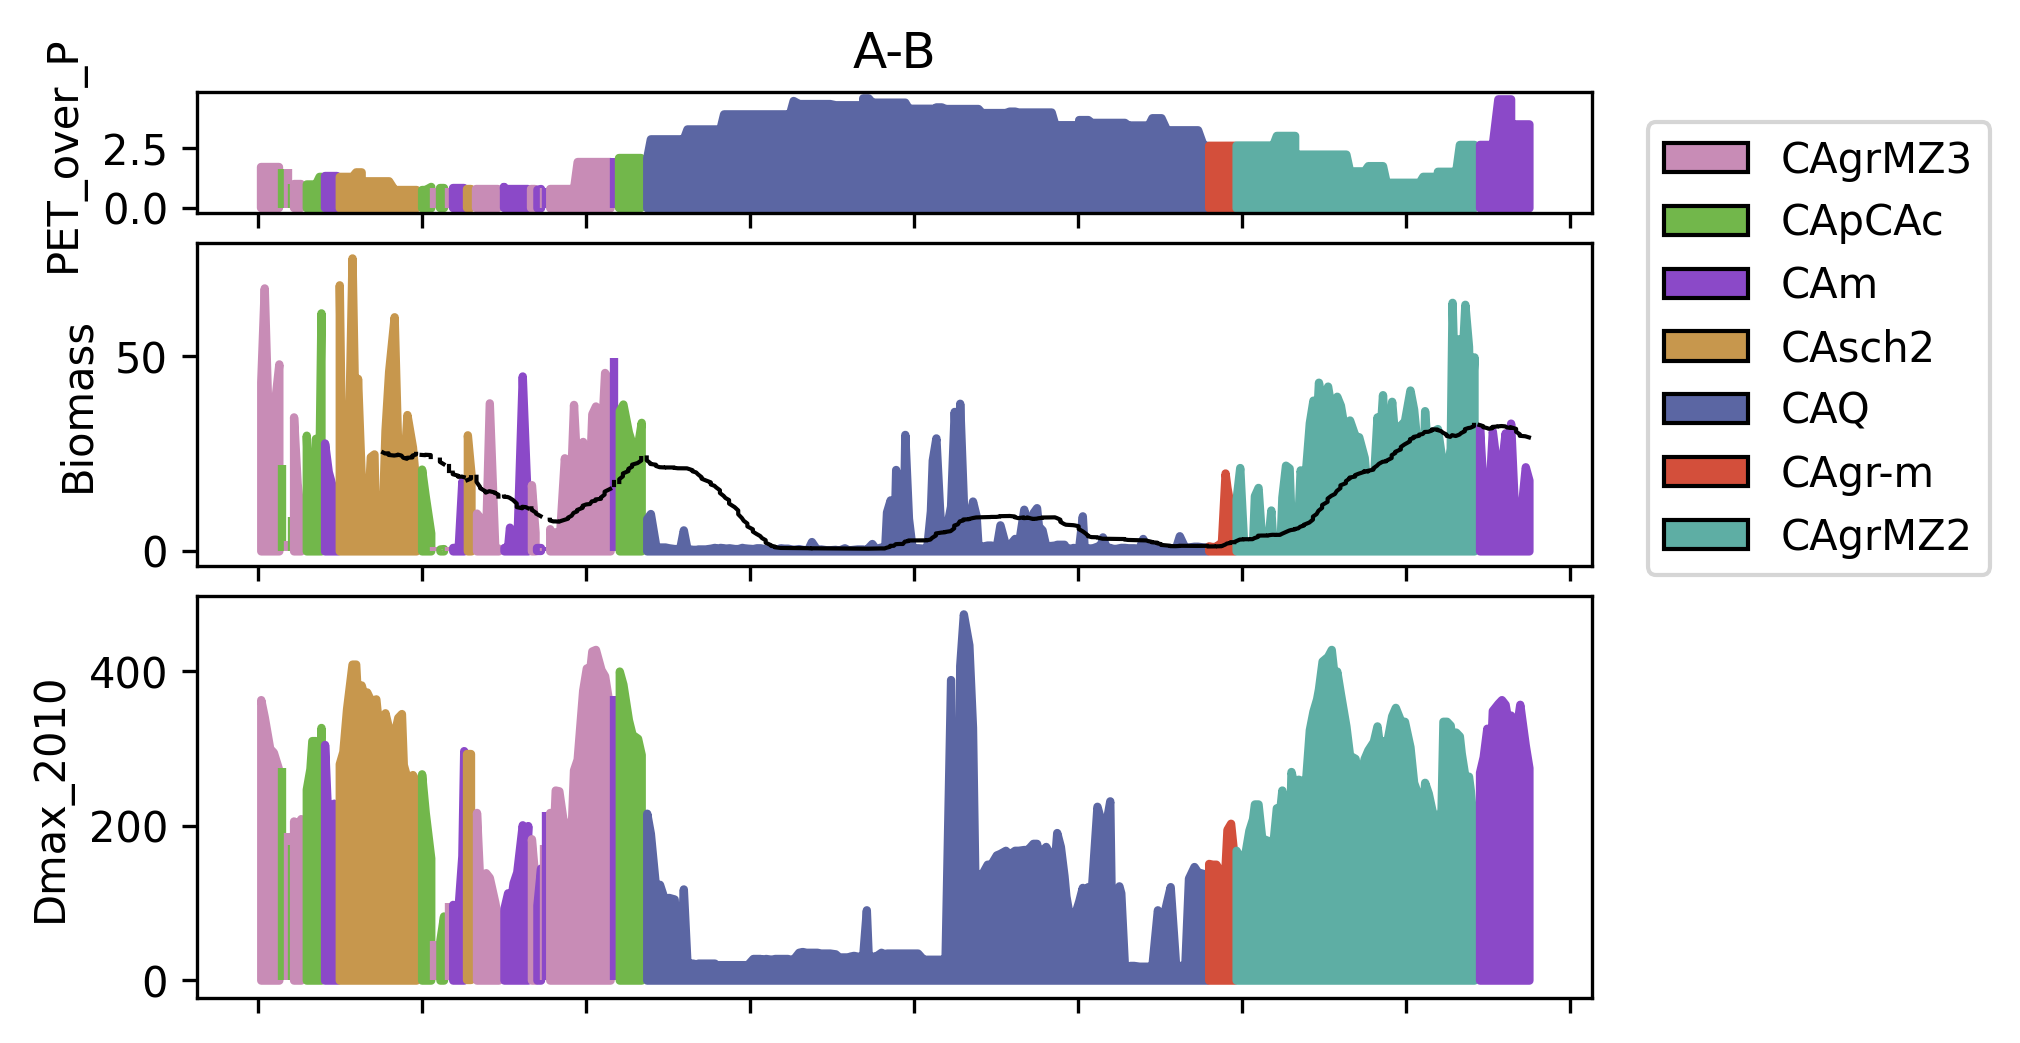

In [139]:
xsection(title = title, df = df, top2 = False, top = top, middle= middle, main= main, middle_straight_avg = False, middle_rolling_avg = True, avg_window = 50, top_size = "30%", middle_size = "80%", top2_size = "20%", lw=2, alpha = 1, bbox_x = bbox_x, bbox_y = bbox_y)


Things we'd like:


*   different years cross section as lines to see change


